# Shipment Price Prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

# 1) Problem Statement:
The market for supply chain analytics is expected to develop at a CAGR of 17.3 percent
from 2019 to 2024, more than doubling in size. This data demonstrates how supply
chain organizations are understanding the advantages of being able to predict what will
happen in the future with a decent degree of certainty. Supply chain leaders may use
this data to address supply chain difficulties, cut costs, and enhance service levels all at
the same time.
The main goal is to predict the supply chain shipment pricing based on the available
factors in the dataset.

### In this project we are going to use the data given to build a Regression model:

This model will predict price of shipment based on the given dataset.

This can be used to get a idea about pricing of shipment based on various factors.

# 2) Data Collection.
* The Dataset is part of Office of Foreign Labor Certification (OFLC)
* The data consists of 10324 Rows and 33 Columns

# 3) Feature Description
* **id** - Unique ID number
* **project code** - Project Code
* **pq #** - Price quote(PQ) number
* **po / so #** - Unique code
* **asn/dn #** - Shipment number: Advanced Shipment Note (ASN) for Direct Drop deliveries, or Delivery Note (DN) for from RDC deliveries
* **country** - Destination Country
* **managed by** - SCMS managing office: either the Program Management Office (PMO) in the U.S. or the relevant SCMS field office
* **fulfill via** - Method through which the shipment was fulfilled: via Direct Drop from vendor or from stock available in the RDC
* **vendor inco term** - The vendor INCO term (also known as International Commercial Terms) for Direct Drop deliveries
* **shipment mode** - Method by which commodities are shipped
* **pq first sent to client date** - Date the PQ is first sent to the client
* **po sent to vendor date** - Date the PO is first sent to the vendor
* **scheduled delivery date** - Current anticipated delivery date
* **delivered to client date** - Date of delivery to client
* **delivery recorded date** - Date on which delivery to client was recorded in SCMS information systems
* **product group** - Product group for item, i.e. ARV, HRDT
* **sub classification** - Identifies relevant product sub classifications, such as whether ARVs are pediatric or adult, whether a malaria product is an artemisinin-based combination therapy (ACT), etc.
* **vendor** - Vendor name
* **item description** - Product name and formulation from Partnership for Supply Chain Management (PFSCM) Item Master
* **molecule/test type** - Active drug(s) or test kit type
* **brand** - Generic or branded name for the item
* **dosage** - Item dosage and unit
* **dosage form** - Dosage form for the item (tablet, oral solution, injection, etc.).
* **unit of measure (per pack)** - Pack quantity (pills or test kits) used to compute unit price
* **line item quantity** - Total quantity (packs) of commodity per line item
* **line item value** - Total value of commodity per line item
* **pack price** - Cost per pack (i.e. month s supply of ARVs, pack of 60 test kits)
* **unit price** - Cost per pill (for drugs) or per test (for test kits)
* **manufacturing site** - Identifies manufacturing site for the line item for direct drop and from RDC deliveries
* **first line designation** - Designates if the line in question shows the aggregated freight costs and weight associated with all items on the ASN DN
* **weight (kilograms)** - Weight for all lines on an ASN DN
* **freight cost (usd)** - Freight charges associated with all lines on the respective ASN DN
* **line item insurance (usd)** - Line item cost of insurance, created by applying an annual flat rate ( ) to commodity cost

## How is freight cost calculated?
* Freight Shipping Rates Are Calculated Based On: Supply and demand in your freight's origin. The type of equipment (trailer) you need. The urgency of your shipment.

In [1]:
#Import neccesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max.columns", None)

In [3]:
import pandas as pd
df = pd.read_csv("D:\\archive (9)\\SCMS_Delivery_History_Dataset.csv")
df.head(3)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.0,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN


In [4]:
df.tail(3)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Aug-15,4-Aug-15,11-Aug-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Zidovudine 30/60mg, dispersible tab...",Lamivudine/Zidovudine,Generic,30/60mg,Chewable/dispersible tablet - FDC,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [5]:
#Basic info abput the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [6]:
df.shape

(10324, 33)

In [7]:
#Missing value
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [8]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [9]:
#replacing space between columns name with _
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('#','')
df.columns = df.columns.str.replace(' ','_')


In [10]:
df.columns

Index(['id', 'project_code', 'pq_', 'po_/_so_', 'asn/dn_', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)'],
      dtype='object')

In [11]:
#Datatypes of the feature
df.dtypes

id                                int64
project_code                     object
pq_                              object
po_/_so_                         object
asn/dn_                          object
country                          object
managed_by                       object
fulfill_via                      object
vendor_inco_term                 object
shipment_mode                    object
pq_first_sent_to_client_date     object
po_sent_to_vendor_date           object
scheduled_delivery_date          object
delivered_to_client_date         object
delivery_recorded_date           object
product_group                    object
sub_classification               object
vendor                           object
item_description                 object
molecule/test_type               object
brand                            object
dosage                           object
dosage_form                      object
unit_of_measure_(per_pack)        int64
line_item_quantity                int64


In [12]:
#dropping Id column
df.drop('id', axis=1, inplace=True)

In [13]:
#Dropping column project_code as it is unique code for each country
df.drop('project_code', axis=1, inplace=True)

In [14]:
#Basic stats about the numeric feature from the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_of_measure_(per_pack),10324.0,77.990895,76.579764,1.0,30.0000,60.000,90.0000,1000.00
line_item_quantity,10324.0,18332.534870,40035.302961,1.0,408.0000,3000.000,17039.7500,619999.00
line_item_value,10324.0,157650.567347,345292.066979,0.0,4314.5925,30471.465,166447.1400,5951990.40
pack_price,10324.0,21.910241,45.609223,0.0,4.1200,9.300,23.5925,1345.64
unit_price,10324.0,0.611701,3.275808,0.0,0.0800,0.160,0.4700,238.65
line_item_insurance_(usd),10037.0,240.117626,500.190568,0.0,6.5100,47.040,252.4000,7708.44


In [15]:
#Basic discription about the cat feature from the dataset
df.describe(include='object').T

,count,unique,top,freq
pq_,10324,1237,Pre-PQ Process,2681
po_/_so_,10324,6233,SCMS-199289,67
asn/dn_,10324,7030,ASN-19166,54
country,10324,43,South Africa,1406
managed_by,10324,4,PMO - US,10265
fulfill_via,10324,2,From RDC,5404
vendor_inco_term,10324,8,N/A - From RDC,5404
shipment_mode,9964,4,Air,6113
pq_first_sent_to_client_date,10324,765,Pre-PQ Process,2476
po_sent_to_vendor_date,10324,897,N/A - From RDC,5404


In [16]:
#formattig column freight_cost_(usd) and weight_(kilograms)
df['freight_cost_(usd)'] = df['freight_cost_(usd)'].str.extract(r'(\d+\.\d+)').astype(float)
df['weight_(kilograms)'] = df['weight_(kilograms)'].str.extract(r'(\d)').astype(float)

In [17]:
df.isnull().mean()*100

pq_                              0.000000
po_/_so_                         0.000000
asn/dn_                          0.000000
country                          0.000000
managed_by                       0.000000
fulfill_via                      0.000000
vendor_inco_term                 0.000000
shipment_mode                    3.487021
pq_first_sent_to_client_date     0.000000
po_sent_to_vendor_date           0.000000
scheduled_delivery_date          0.000000
delivered_to_client_date         0.000000
delivery_recorded_date           0.000000
product_group                    0.000000
sub_classification               0.000000
vendor                           0.000000
item_description                 0.000000
molecule/test_type               0.000000
brand                            0.000000
dosage                          16.815188
dosage_form                      0.000000
unit_of_measure_(per_pack)       0.000000
line_item_quantity               0.000000
line_item_value                  0

* Target feature has most missing values about 44%

# Exploratory Data Analysis

## Univariate Data Analysis

In [18]:
cat_columns = [col for col in df.columns if df[col].dtype == 'O']
cat_columns

['pq_',
 'po_/_so_',
 'asn/dn_',
 'country',
 'managed_by',
 'fulfill_via',
 'vendor_inco_term',
 'shipment_mode',
 'pq_first_sent_to_client_date',
 'po_sent_to_vendor_date',
 'scheduled_delivery_date',
 'delivered_to_client_date',
 'delivery_recorded_date',
 'product_group',
 'sub_classification',
 'vendor',
 'item_description',
 'molecule/test_type',
 'brand',
 'dosage',
 'dosage_form',
 'manufacturing_site',
 'first_line_designation']

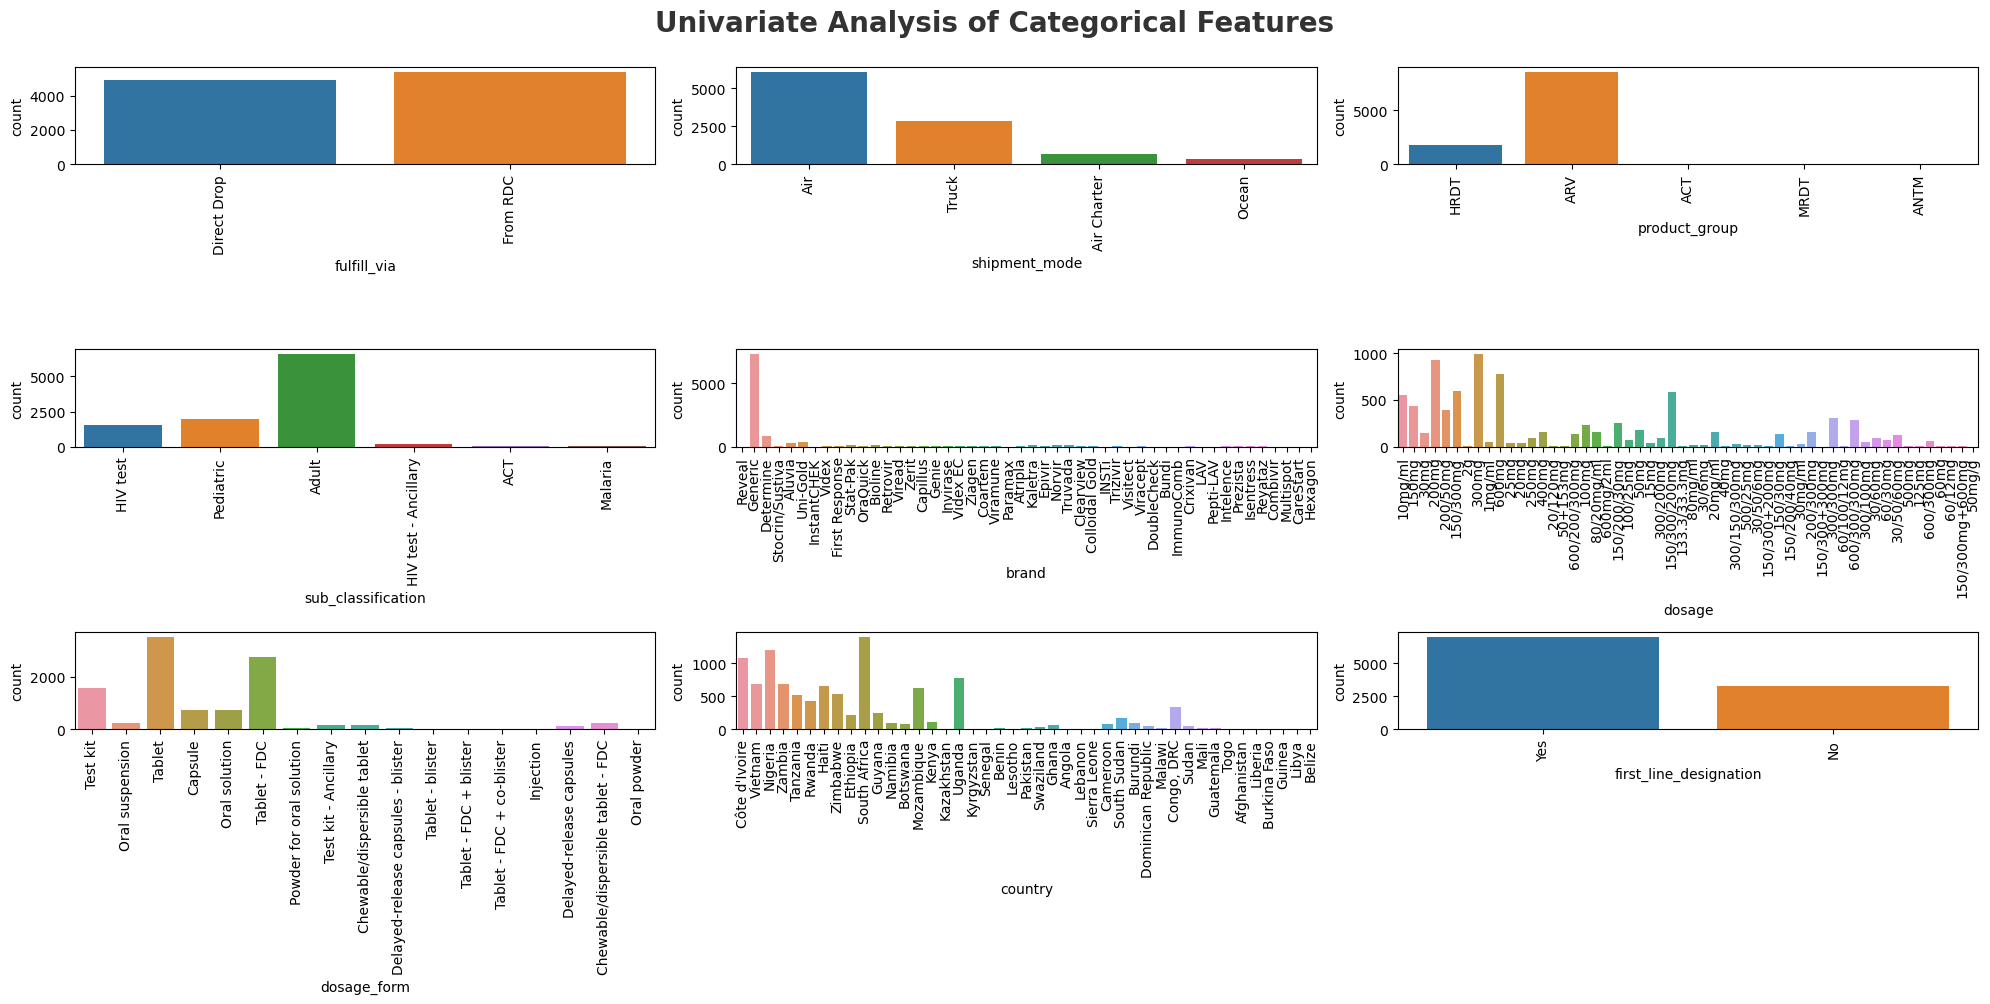

In [19]:
# categorical columns
plt.figure(figsize=(20, 10))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'fulfill_via', 'shipment_mode', 'product_group', 'sub_classification', 'brand', 'dosage', 'dosage_form','country', 'first_line_designation',
       ]
for i in range(0, len(cat1)):
    plt.subplot(3, 3, i+1) # (3,3) (no of line, no of graphs)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Numeric features

In [20]:
num_columns = [col for col in df.columns if df[col].dtype != 'O']
num_columns

['unit_of_measure_(per_pack)',
 'line_item_quantity',
 'line_item_value',
 'pack_price',
 'unit_price',
 'weight_(kilograms)',
 'freight_cost_(usd)',
 'line_item_insurance_(usd)']

<Figure size 1500x1500 with 0 Axes>

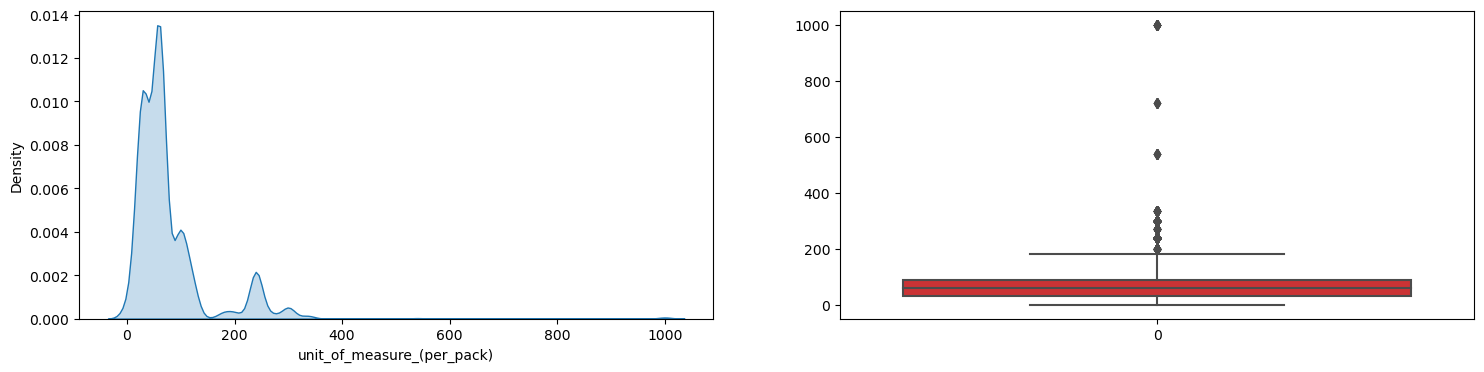

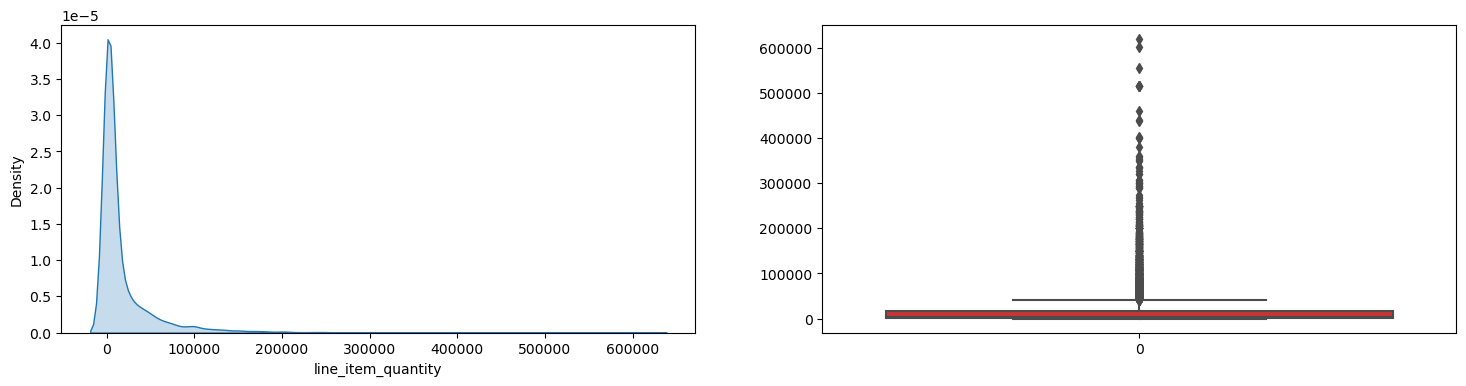

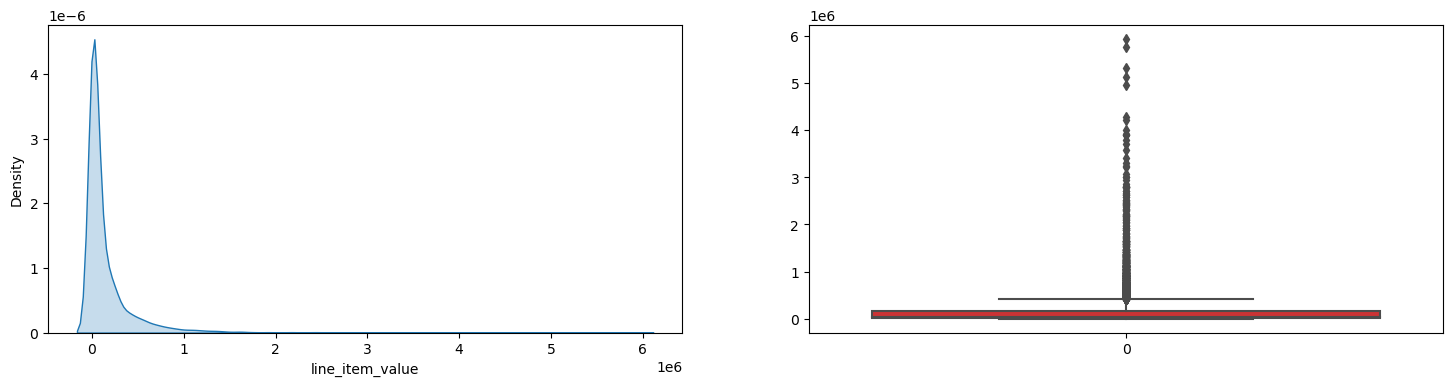

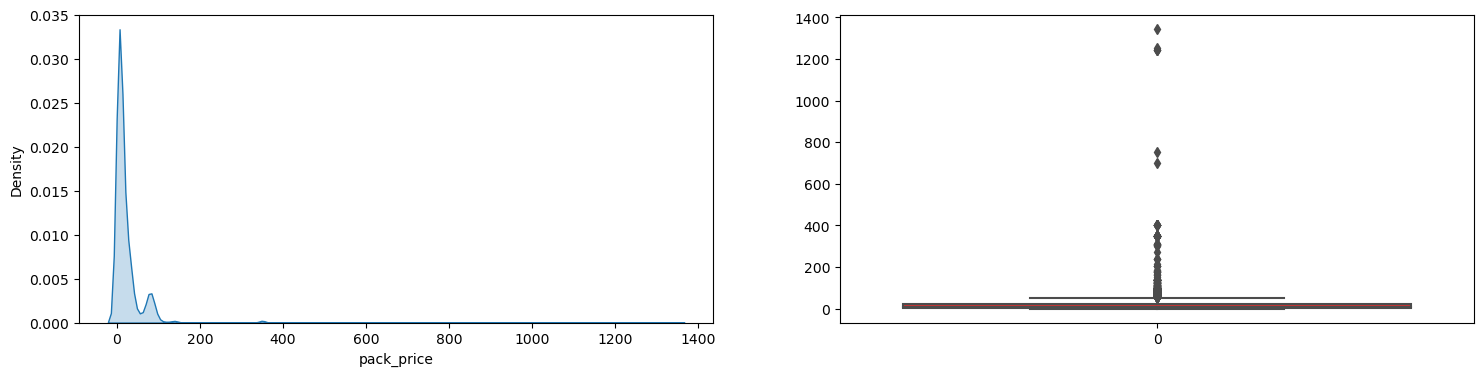

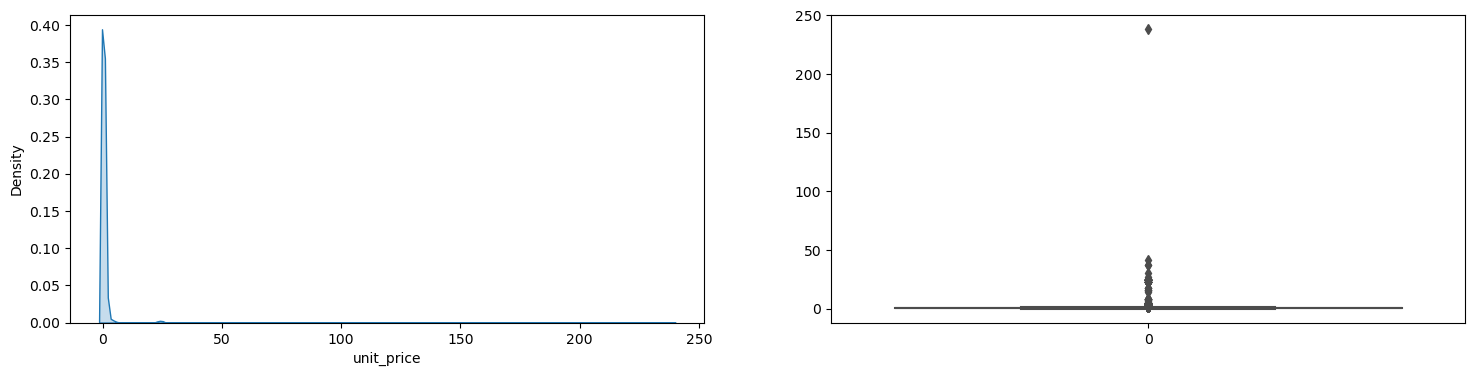

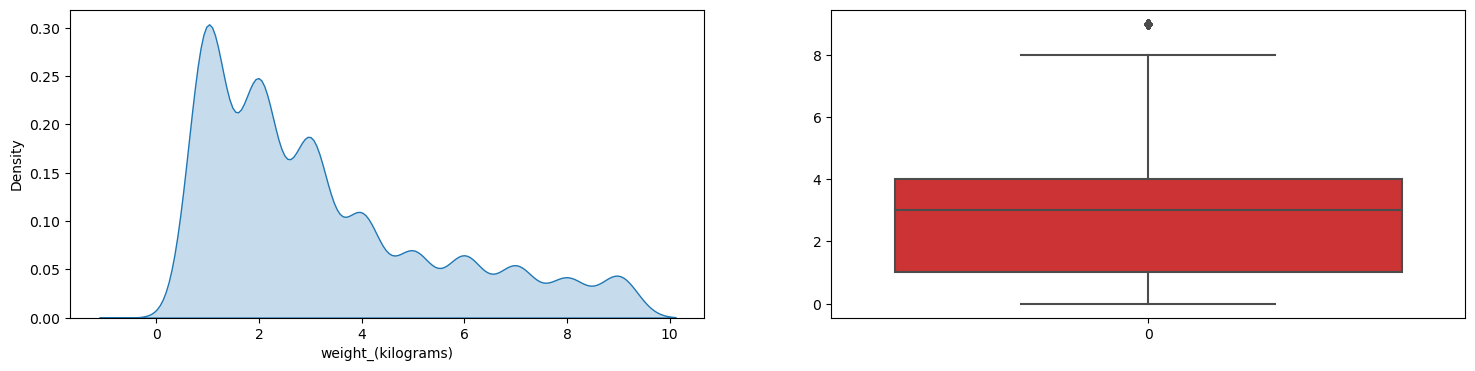

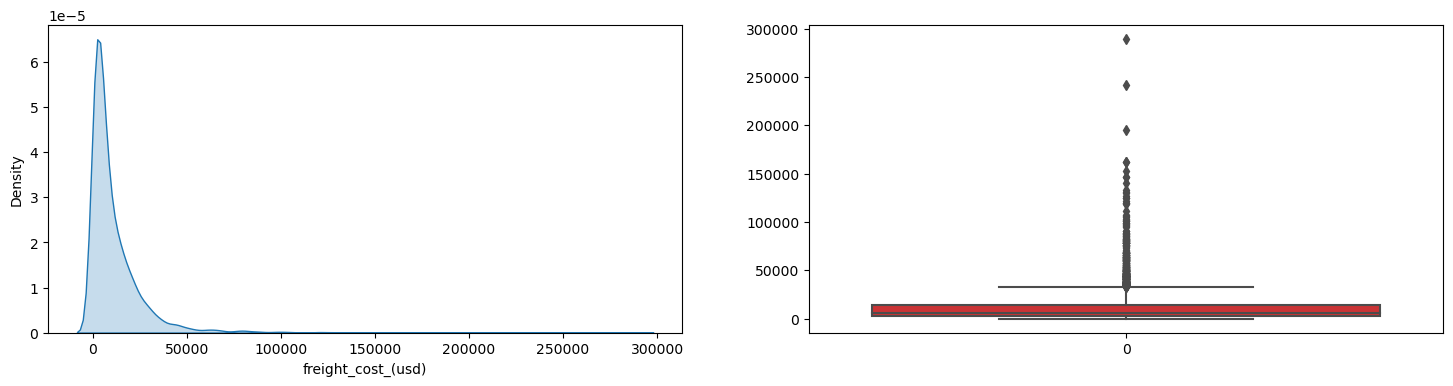

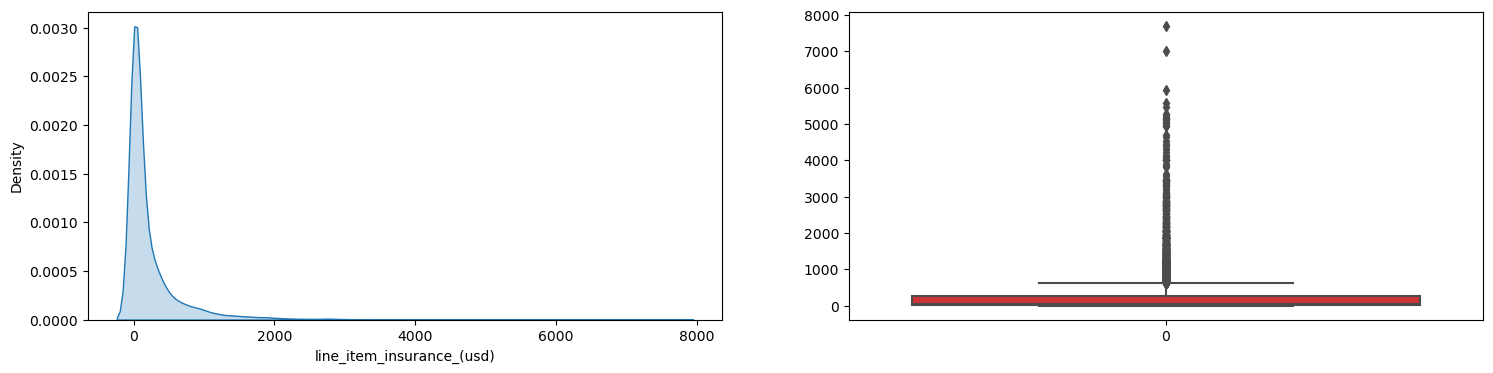

In [21]:
#Numeric features
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for col in num_columns:
    fig, axes = plt.subplots(1,2, figsize=(18,4))
    sns.kdeplot(df[col], ax=axes[0], fill=True)
    sns.boxplot(df[col], ax=axes[1], palette='Set1')

#### Observation
* Numeric Features are skewed, we can say this features have outlier

<Axes: xlabel='freight_cost_(usd)', ylabel='Density'>

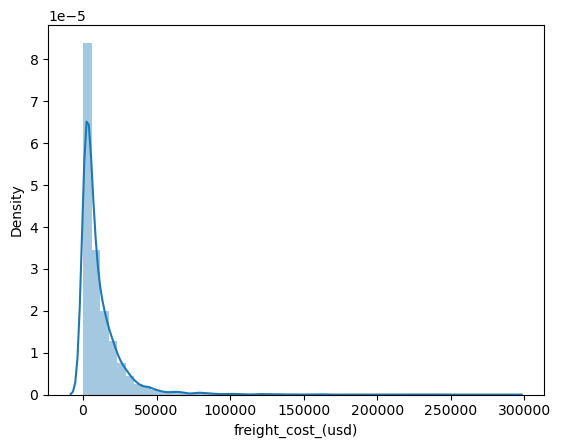

In [22]:
#Target feature
sns.distplot(df['freight_cost_(usd)'])

<Axes: >

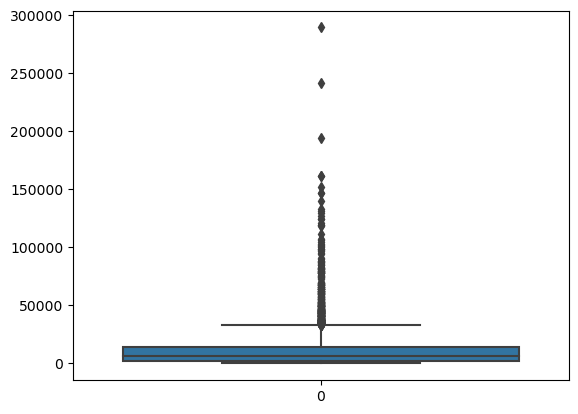

In [23]:
#Boxplot for target Feature
sns.boxplot(df['freight_cost_(usd)'])

### Muticolinearity between numerical features

In [24]:
# Check multicollinarity in Numerical columns
df[num_columns].corr()

,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,weight_(kilograms),freight_cost_(usd),line_item_insurance_(usd)
unit_of_measure_(per_pack),1.000000,-0.151020,-0.128666,0.097182,-0.102806,-0.005316,-0.052972,-0.131825
line_item_quantity,-0.151020,1.000000,0.839081,-0.133651,-0.052227,0.045167,0.359893,0.798662
line_item_value,-0.128666,0.839081,1.000000,-0.018809,-0.019583,0.022141,0.419487,0.961353
pack_price,0.097182,-0.133651,-0.018809,1.000000,0.250043,-0.024506,-0.008027,-0.015398
unit_price,-0.102806,-0.052227,-0.019583,0.250043,1.000000,-0.006341,0.141560,-0.021433
weight_(kilograms),-0.005316,0.045167,0.022141,-0.024506,-0.006341,1.000000,-0.012506,0.022844
freight_cost_(usd),-0.052972,0.359893,0.419487,-0.008027,0.141560,-0.012506,1.000000,0.369035
line_item_insurance_(usd),-0.131825,0.798662,0.961353,-0.015398,-0.021433,0.022844,0.369035,1.000000


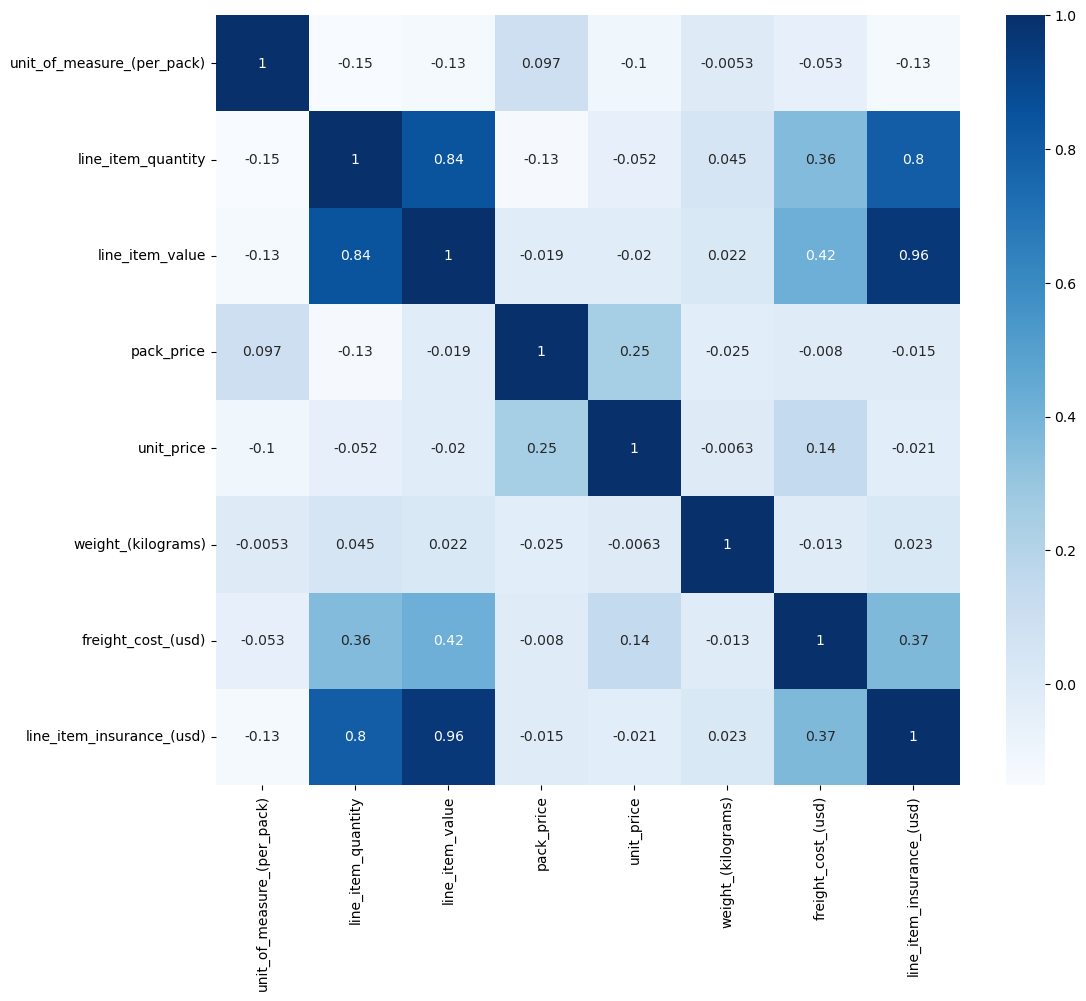

In [25]:
df1 = df.copy()
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(), annot=True, cmap='Blues')
plt.show()

#### Observation
* Feature line_item_value, line_item_insurance_(usd), line_item_quality are highly positively correlated


In [26]:
# Feature selection with person correlation

In [27]:
def correlation(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    
    
correlation(df1, 0.8)

{'line_item_insurance_(usd)', 'line_item_value'}

### Muticolinearity between categorical features

In [28]:
from scipy.stats import chi2_contingency
categorical_features=[ 'fulfill_via', 'shipment_mode', 'product_group', 'sub_classification', 'brand', 'dosage', 'dosage_form','country', 'first_line_designation',
       ]
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['freight_cost_(usd)'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,fulfill_via,Reject Null Hypothesis
1,shipment_mode,Reject Null Hypothesis
2,product_group,Reject Null Hypothesis
3,sub_classification,Reject Null Hypothesis
4,brand,Reject Null Hypothesis
5,dosage,Reject Null Hypothesis
6,dosage_form,Reject Null Hypothesis
7,country,Reject Null Hypothesis
8,first_line_designation,Fail to Reject Null Hypothesis


In [29]:
continous_num_feature = [feature for feature in num_columns if (df[feature].nunique())<10]
continous_num_feature


[]

# Bivariate Analysis

In [30]:
df.head(2)

,pq_,po_/_so_,asn/dn_,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,pq_first_sent_to_client_date,po_sent_to_vendor_date,scheduled_delivery_date,delivered_to_client_date,delivery_recorded_date,product_group,sub_classification,vendor,item_description,molecule/test_type,brand,dosage,dosage_form,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),line_item_insurance_(usd)
0,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,1.0,780.34,NaN
1,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",Yes,3.0,4521.50,NaN


###  Price rate for different shipment mode

In [31]:
# Price rate for different shipment mode
shipment_mode_rate = df.groupby('shipment_mode')['freight_cost_(usd)'].mean().to_frame()
shipment_mode_rate.reset_index()

,shipment_mode,freight_cost_(usd)
0,Air,10670.693822
1,Air Charter,19760.929307
2,Ocean,12607.966630
3,Truck,10463.985412


Text(0, 0.5, 'freight_cost(USD)')

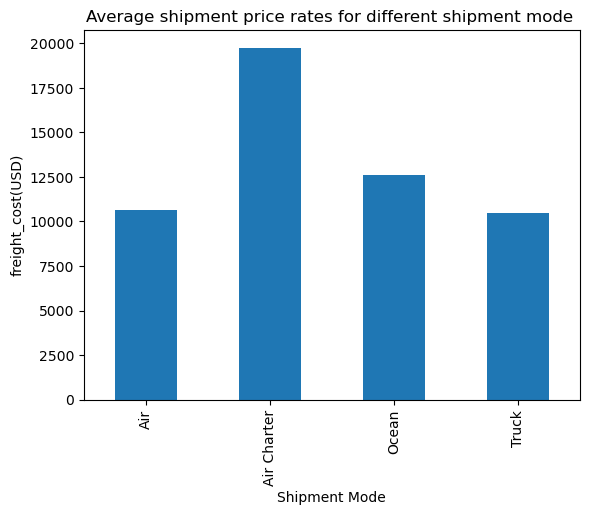

In [32]:
shipment_mode_rate.plot(kind='bar', legend=False)
plt.title("Average shipment price rates for different shipment mode ")
plt.xlabel("Shipment Mode")
plt.ylabel("freight_cost(USD)")

#### Observation
* Charter Airplane are most expensive mode among the all other shipment modes
* Followed by Ocean and Air path
* By road (truck) are cheaper than other shipment modes, it will aslo takes more time to delivered the order 

In [33]:
rate_of_methods_of_shipment = df.groupby('fulfill_via')['freight_cost_(usd)'].mean().to_frame()
rate_of_methods_of_shipment.reset_index()

,fulfill_via,freight_cost_(usd)
0,Direct Drop,11576.990694
1,From RDC,10861.190754


Text(0, 0.5, 'freight_cost_(usd)')

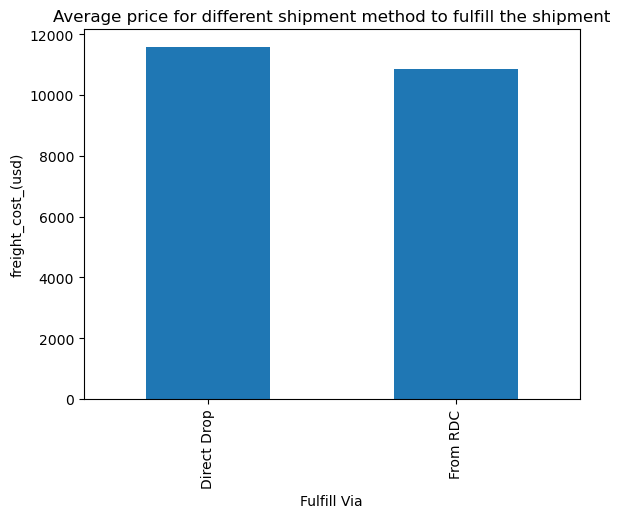

In [34]:
rate_of_methods_of_shipment.plot(kind = 'bar', legend = False)
plt.title("Average price for different shipment method to fulfill the shipment")
plt.xlabel("Fulfill Via")
plt.ylabel("freight_cost_(usd)")

#### Observation
* There is no big difference between both the methods, But `direct drop`(zero stop) have more average price rate than `from RDC` 
* From RDC (`Regional Distribution Centre` which is a large warehouse for one or more companies. Such locations have many deliveries every day and can be challenging points to get freight into.)

In [35]:
ManagedCompany_in_country = df.groupby('country')['managed_by'].value_counts().to_frame()
ManagedCompany_in_country

,,managed_by
country,managed_by,
Afghanistan,PMO - US,3
Angola,PMO - US,7
Belize,PMO - US,1
Benin,PMO - US,13
Botswana,PMO - US,70
Burkina Faso,PMO - US,2
Burundi,PMO - US,98
Cameroon,PMO - US,75
"Congo, DRC",PMO - US,333


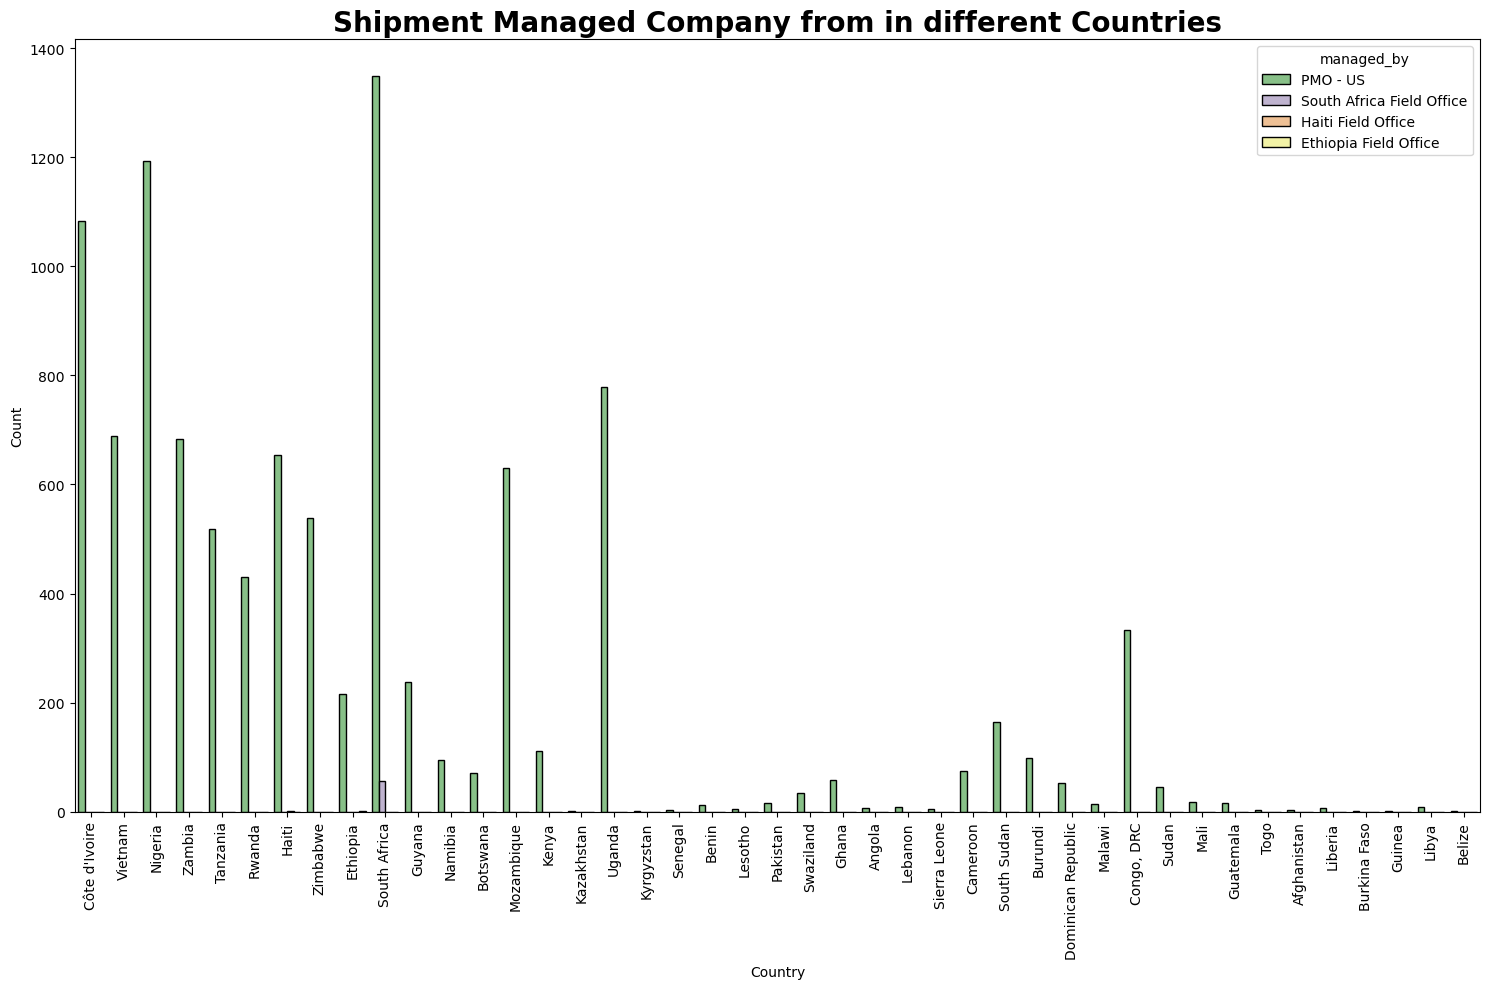

In [36]:
plt.subplots(figsize = (15,10))
sns.countplot(data= df, x='country', hue= 'managed_by', ec='black', palette= 'Accent')
plt.title("Shipment Managed Company from in different Countries", fontsize=20, weight='bold')
plt.xlabel('Country')
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()

#### Observation
* In almost all countries shipment managed by PMO-US company
* Only in few countries shipment managed by other different companies

In [37]:
df.head(1)

,pq_,po_/_so_,asn/dn_,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,pq_first_sent_to_client_date,po_sent_to_vendor_date,scheduled_delivery_date,delivered_to_client_date,delivery_recorded_date,product_group,sub_classification,vendor,item_description,molecule/test_type,brand,dosage,dosage_form,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),line_item_insurance_(usd)
0,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,1.0,780.34,NaN


In [38]:
df['po_sent_to_vendor_date'].value_counts()

N/A - From RDC       5404
Date Not Captured     328
8/27/14                80
3/19/10                78
8/29/14                76
                     ... 
5/18/15                 1
2/10/14                 1
10/16/13                1
12/9/11                 1
8/29/12                 1
Name: po_sent_to_vendor_date, Length: 897, dtype: int64

In [39]:
df['pq_first_sent_to_client_date'].value_counts()

Pre-PQ Process       2476
Date Not Captured     205
9/11/14               205
7/11/13               173
4/30/14               123
                     ... 
7/29/10                 1
10/3/11                 1
12/17/13                1
2/5/15                  1
8/29/13                 1
Name: pq_first_sent_to_client_date, Length: 765, dtype: int64

In [40]:
#Dropping feature po_sent_to_vendor_date and pq_first_sent_to_client_date
df.drop('pq_first_sent_to_client_date', axis=1, inplace=True)
df.drop('po_sent_to_vendor_date', axis=1, inplace=True)

#### Observation
* Most of dates are missing from the columns
* It is just a dates of documentation to sent to client and vendors, it seems like there is no correlation between this features and target features

In [41]:
df['delivered_to_client_date'] = pd.to_datetime(df['delivered_to_client_date'])

In [42]:
df['scheduled_delivery_date'] = pd.to_datetime(df['scheduled_delivery_date'])

In [43]:
df['delivery_recorded_date'] = pd.to_datetime(df['delivery_recorded_date'])

In [44]:
#Checking if delivery is delivered on time or is there any delay if yes then how many days
df['delay_by(days)'] = df['delivered_to_client_date'] - df['scheduled_delivery_date']
df['delay_by(days)'] = df['delay_by(days)'].dt.days

In [45]:
#For checking delivery status
on_time = 0
before_time = 0
delay = 0
for i in df['delay_by(days)']:
    if i == 0:
        on_time += 1
    elif i>0:
        delay += 1
    elif i<0:
        before_time += 1
        
print(f"{on_time} shipments are delivered on expected day")
print(f"{delay} shipments are delayed")
print(f"{before_time} shipments are delivered before expected day")
    



6324 shipments are delivered on expected day
1186 shipments are delayed
2814 shipments are delivered before expected day


### Observation
* Over 6324 shipment are delivered on time
* 1186 shipment are delivered before the expected day
* 2814 shipments are delay

In [46]:
df.drop('delivered_to_client_date', axis = 1, inplace=True)


In [47]:
df.drop('scheduled_delivery_date', axis=1, inplace=True)

In [48]:
df.drop('delivery_recorded_date', axis=1, inplace=True)

In [49]:
df.head()

,pq_,po_/_so_,asn/dn_,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,product_group,sub_classification,vendor,item_description,molecule/test_type,brand,dosage,dosage_form,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),line_item_insurance_(usd),delay_by(days)
0,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,1.0,780.34,NaN,0
1,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,3.0,4521.50,NaN,0
2,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,1.0,1653.78,NaN,0
3,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1.0,16007.06,NaN,0
4,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7.0,45450.08,NaN,0


In [50]:
df.columns

Index(['pq_', 'po_/_so_', 'asn/dn_', 'country', 'managed_by', 'fulfill_via',
       'vendor_inco_term', 'shipment_mode', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule/test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_(per_pack)', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)', 'delay_by(days)'],
      dtype='object')

Text(0.5, 1.0, 'Relation between line_item_quantity and freight_cost(USD) ')

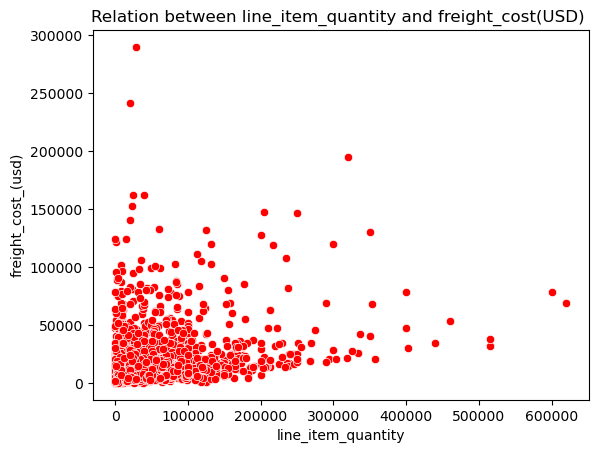

In [51]:
#scatterplot for line_item_quantity and freight_cost
sns.scatterplot(data=df, x='line_item_quantity', y='freight_cost_(usd)',color = 'Red')
plt.title('Relation between line_item_quantity and freight_cost(USD) ')

#### Observation
* There is small positive correlation between line_item_quantity and freight_cost

In [52]:
unit_price_dosage = df.groupby(['brand', 'dosage_form'])['unit_price'].mean().to_frame()
unit_price_dosage.head(20)

unit_price
brand          dosage_form                            
Aluvia         Tablet                         0.361000
Atripla        Tablet - FDC                   1.680000
Bioline        Test kit                       0.784862
               Test kit - Ancillary           0.900000
Bundi          Test kit                      37.500000
Capillus       Test kit                       1.479429
CareStart      Test kit                       0.390000
Clearview      Test kit                       3.168421
Coartem        Tablet - FDC + blister         0.066667
Colloidal Gold Test kit                      24.085714
Combivir       Tablet - FDC                   0.396667
Crixivan       Capsule                        0.278611
Determine      Test kit                       0.813655
               Test kit - Ancillary           2.726622
DoubleCheck    Test kit                       1.890000
Epivir         Oral solution                  0.025625
               Tablet                         0.120000
First Response Test kit                       0.614000
Generic        Capsule                        0.093517
               Chewable/dispersible tablet    0.142597

Text(0.5, 1.0, 'Is delay delivery affect on freight cost?')

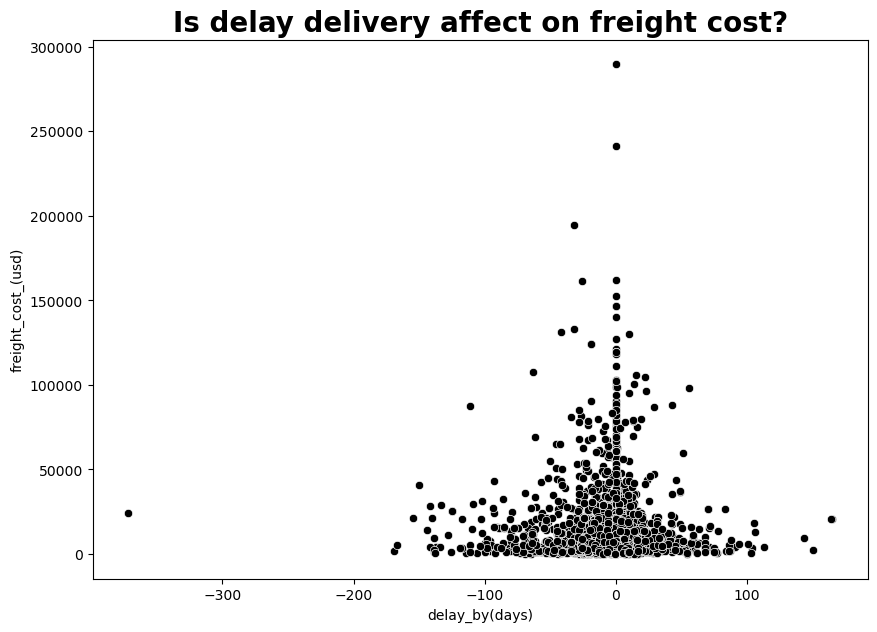

In [53]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='delay_by(days)', y='freight_cost_(usd)', color='Black')
plt.title("Is delay delivery affect on freight cost?", fontsize=20, weight='bold')

#### Observation
* It doesn't seem like the delay of delivery or delivered before expected day affect on cost 
* Maybe other features aspect are also responsible for freight cost

In [54]:
df.groupby('first_line_designation')['freight_cost_(usd)'].mean().to_frame()

,freight_cost_(usd)
first_line_designation,
No,NaN
Yes,11222.710919


In [55]:
df[df['first_line_designation'] == 'No']

,pq_,po_/_so_,asn/dn_,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,product_group,sub_classification,vendor,item_description,molecule/test_type,brand,dosage,dosage_form,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),line_item_insurance_(usd),delay_by(days)
8,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,273,532.35,1.95,0.03,"Aurobindo Unit III, India",No,9.0,NaN,NaN,0
48,Pre-PQ Process,SCMS-19800,ASN-1665,South Africa,PMO - US,Direct Drop,DDP,Truck,ARV,Pediatric,S. BUYS WHOLESALER,"Stavudine 1mg/ml [Zerit], powder for oral solu...",Stavudine,Zerit,1mg/ml,Powder for oral solution,200,600,870.00,1.45,0.01,"BMS Meymac, France",No,NaN,NaN,1.39,0
57,Pre-PQ Process,SCMS-23500,ASN-2293,South Africa,PMO - US,Direct Drop,DDP,Truck,ARV,Pediatric,S. BUYS WHOLESALER,"Stavudine 1mg/ml [Zerit], powder for oral solu...",Stavudine,Zerit,1mg/ml,Powder for oral solution,200,670,1025.10,1.53,0.01,"BMS Meymac, France",No,NaN,NaN,1.64,-104
78,Pre-PQ Process,SCMS-33320,ASN-3553,South Africa,PMO - US,Direct Drop,DDP,Truck,ARV,Pediatric,S. BUYS WHOLESALER,"Stavudine 1mg/ml [Zerit], powder for oral solu...",Stavudine,Zerit,1mg/ml,Powder for oral solution,200,600,858.00,1.43,0.01,"BMS Meymac, France",No,NaN,NaN,1.68,-220
79,Pre-PQ Process,SCMS-33320,ASN-3553,South Africa,PMO - US,Direct Drop,DDP,Truck,ARV,Pediatric,S. BUYS WHOLESALER,"Didanosine 100mg [Videx],chewable tablets, 60 ...",Didanosine,Videx,100mg,Chewable/dispersible tablet,60,7,91.35,13.05,0.22,"BMS Meymac, France",No,NaN,NaN,0.18,-220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10318,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,205243,738874.80,3.60,0.06,"Cipla, Goa, India",No,4.0,NaN,869.66,-16
10319,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,4.0,NaN,705.79,-16
10320,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,4.0,NaN,161.71,6
10321,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,NaN,NaN,5284.04,-6


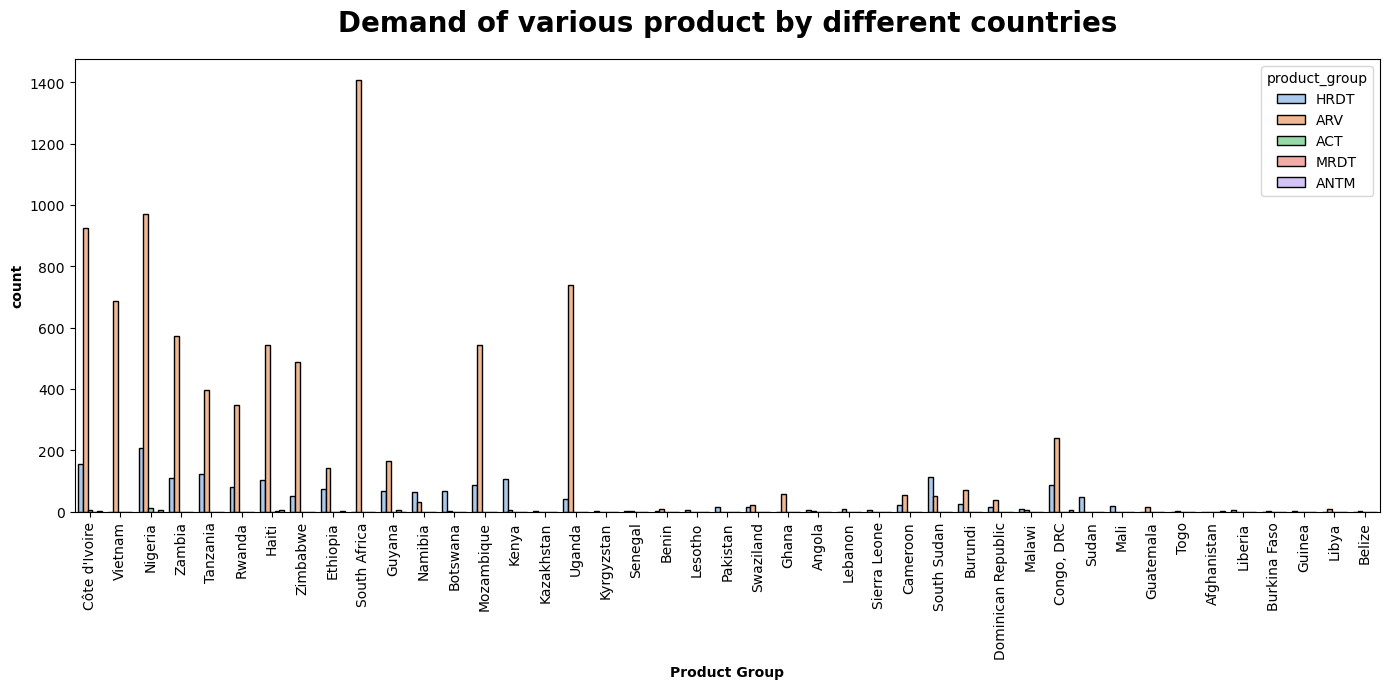

In [56]:
plt.subplots(figsize=(14,7))
sns.countplot(x='country', hue='product_group', data=df, ec='black', palette='pastel')
plt.title('Demand of various product by different countries', weight = 'bold', fontsize=20, pad=20)
plt.xlabel('Product Group', weight='bold')
plt.ylabel('count', weight='bold')
plt.xticks(rotation=90)
plt.tight_layout()

#### Observation
* Most deliveries are shipped in South Africa and quantity of ARV and HRDT product is High
* Followed by Nigeria and Cote d'lvoire ordered same product groups

In [57]:
df.columns

Index(['pq_', 'po_/_so_', 'asn/dn_', 'country', 'managed_by', 'fulfill_via',
       'vendor_inco_term', 'shipment_mode', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule/test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_(per_pack)', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)', 'delay_by(days)'],
      dtype='object')

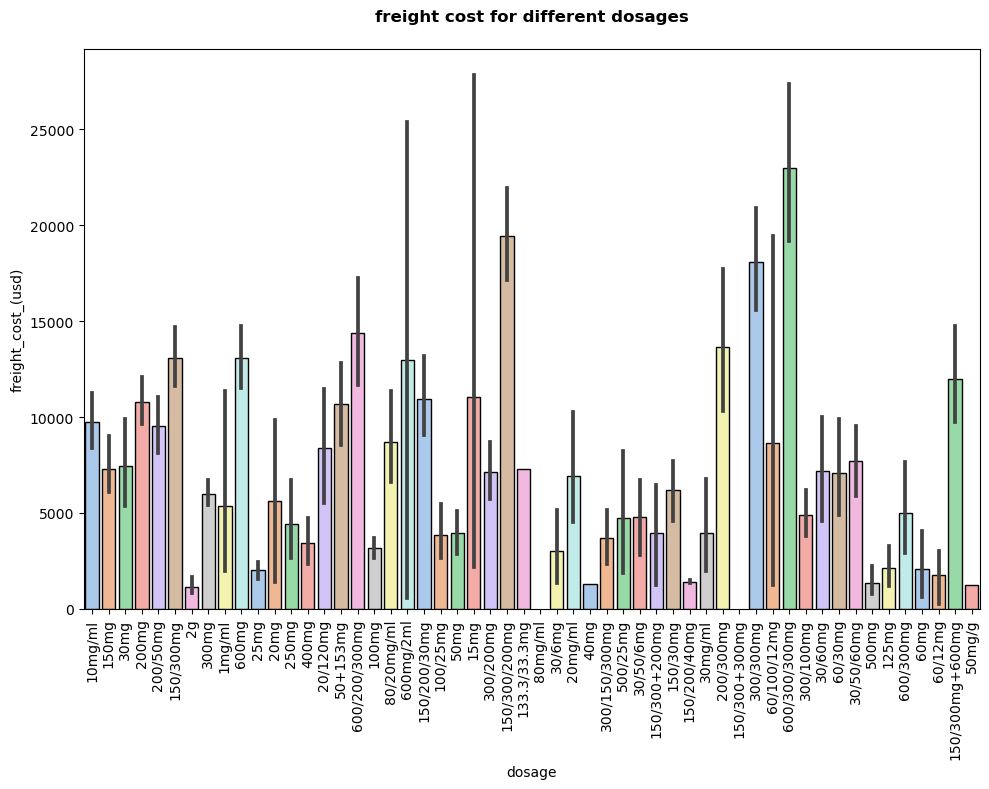

In [70]:
plt.subplots(figsize=(10,8))
sns.barplot(data=df, x='dosage', y='freight_cost_(usd)', ec='black', palette='pastel')
plt.title('freight cost for different dosages', weight='bold', pad=20 )
plt.xticks(rotation=90)
plt.tight_layout()

#### Observation
* Dosage price is depend upon the quantity of dosage
* if there are multiple dosage with different quantity like 600/300/300m it means order of 3 different dosage at once
* Compare to one order multiple orders have higher freight cost depend on quantity

In [82]:
# We can drop column item_description as it indicate details about the item which contains, 
#molecule/test typw , brand, dosage and dosage_form
df.drop('item_description', axis=1, inplace=True)

In [84]:
df.head()

,pq_,po_/_so_,asn/dn_,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,product_group,sub_classification,vendor,molecule/test_type,brand,dosage,dosage_form,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),line_item_insurance_(usd),delay_by(days)
0,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,1.0,780.34,NaN,0
1,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Pediatric,Aurobindo Pharma Limited,Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,3.0,4521.50,NaN,0
2,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,1.0,1653.78,NaN,0
3,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1.0,16007.06,NaN,0
4,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Aurobindo Pharma Limited,Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7.0,45450.08,NaN,0


Text(0, 0.5, 'Count')

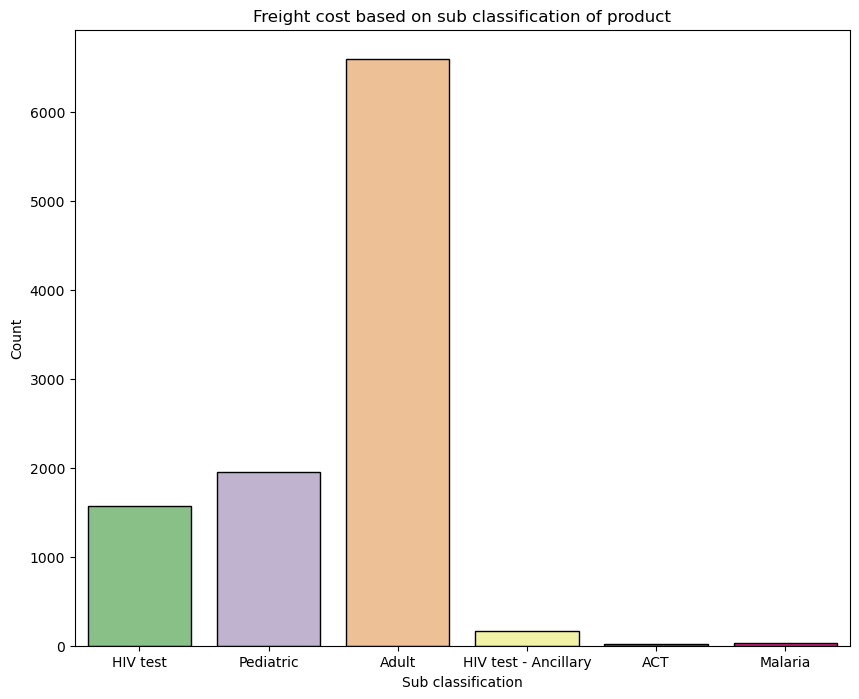

In [87]:
plt.subplots(figsize=(10,8))
sns.countplot(data=df, x='sub_classification', ec='black', palette= 'Accent')
plt.title('Freight cost based on sub classification of product')
plt.xlabel('Sub classification')
plt.ylabel('Count')

In [100]:
average_price_for_sub_products =df.groupby('sub_classification')['freight_cost_(usd)'].mean().to_frame().reset_index()
average_price_for_sub_products

,sub_classification,freight_cost_(usd)
0,ACT,8759.196154
1,Adult,11754.157529
2,HIV test,13495.920806
3,HIV test - Ancillary,4427.867222
4,Malaria,6647.847391
5,Pediatric,6874.981931


Text(0.5, 1.0, 'Average freight cost for different sub products')

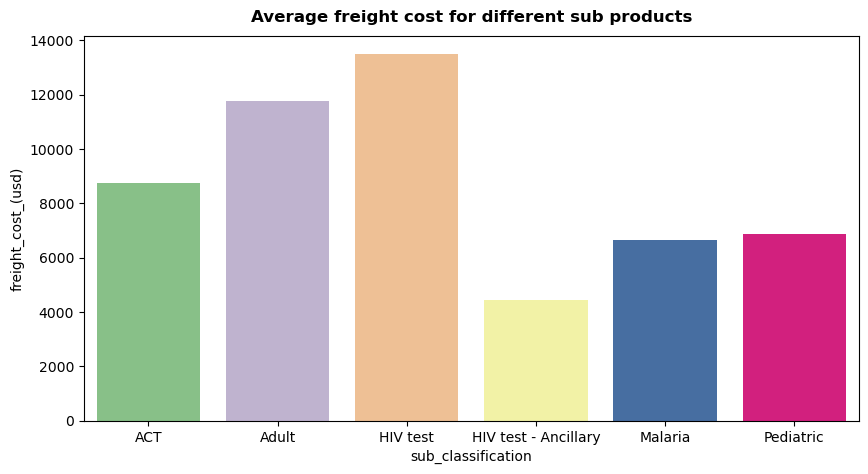

In [108]:
plt.subplots(figsize=(10,5))
sns.barplot(data=average_price_for_sub_products, x='sub_classification', y='freight_cost_(usd)', palette='Accent')
plt.title('Average freight cost for different sub products', weight='bold', pad=10)

#### Observation
* HIV test kit among all different products
* However the demand of Adult products are high

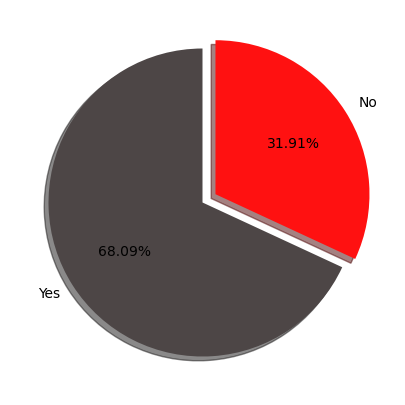

In [114]:
percentage = df.first_line_designation.value_counts(normalize=True)*100
labels = ['Yes', 'No']

#Plotting piechart with plotly library
fig, ax = plt.subplots(figsize = (8,5))
explode = (0, 0.1)
colors = ['#4d4646', '#ff1111']
ax.pie(percentage, labels=labels , startangle =90,
      autopct = '%1.2f%%', explode = explode , shadow=True, colors = colors)
plt.show()

#### Observation 
* 68.09% have first line designation
* else do not have

In [115]:
#Top 20 Total USD spent on shipment by each country
Top_10_country_spend_on_shipment = df.groupby('country')['freight_cost_(usd)'].sum().nlargest(10).to_frame().reset_index().rename(columns = {'line_item_insurance_(usd)':'Total spent'})
Top_10_country_spend_on_shipment

,country,freight_cost_(usd)
0,Nigeria,12244501.39
1,Zambia,6183095.21
2,Rwanda,5688435.23
3,Côte d'Ivoire,5619519.51
4,Uganda,5080816.24
5,Tanzania,4590090.32
6,Zimbabwe,4161128.86
7,Haiti,3844227.93
8,Mozambique,3179737.06
9,Vietnam,2715431.29


Text(0.5, 1.0, 'Top 10 countries spent on shipments')

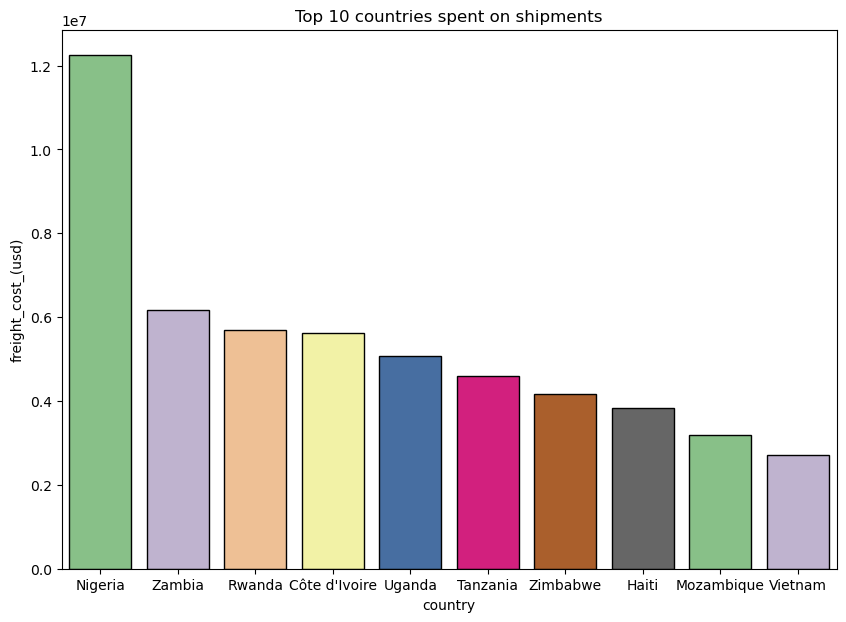

In [116]:
plt.subplots(figsize = (10,7))
sns.barplot(data=Top_10_country_spend_on_shipment, x='country',
            y='freight_cost_(usd)', ec='black', palette='Accent')
plt.title('Top 10 countries spent on shipments')



#### Observation
* Nigeria spent most money among all other country which is more than 12M us doller.
* Most countries are from africa region whoe spended money on shipments.

In [61]:
df.head(1)

,pq_,po_/_so_,asn/dn_,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,product_group,sub_classification,vendor,item_description,molecule/test_type,brand,dosage,dosage_form,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),line_item_insurance_(usd),delay_by(days)
0,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,1.0,780.34,NaN,0


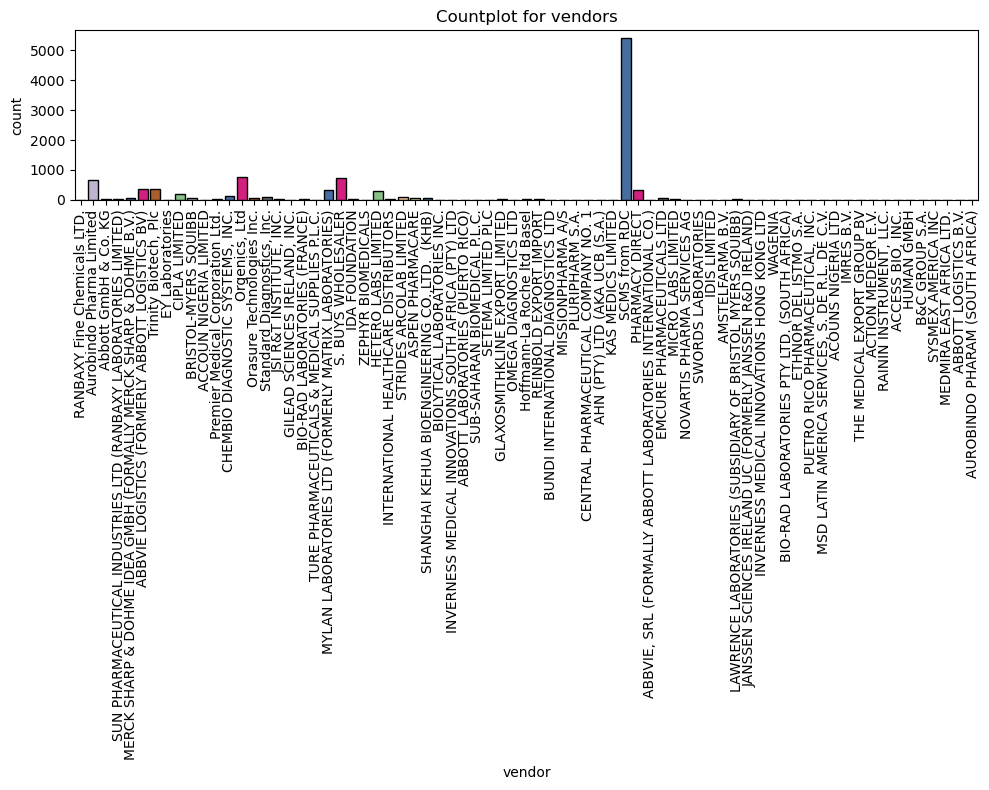

In [124]:
plt.subplots(figsize=(10,8))
sns.countplot(data=df, x='vendor',ec='black', palette='Accent')
plt.title("Countplot for vendors")
plt.xticks(rotation=90)
plt.tight_layout()

Text(0.5, 1.0, 'Weight(KG) Vs freight_cost_(USD) ')

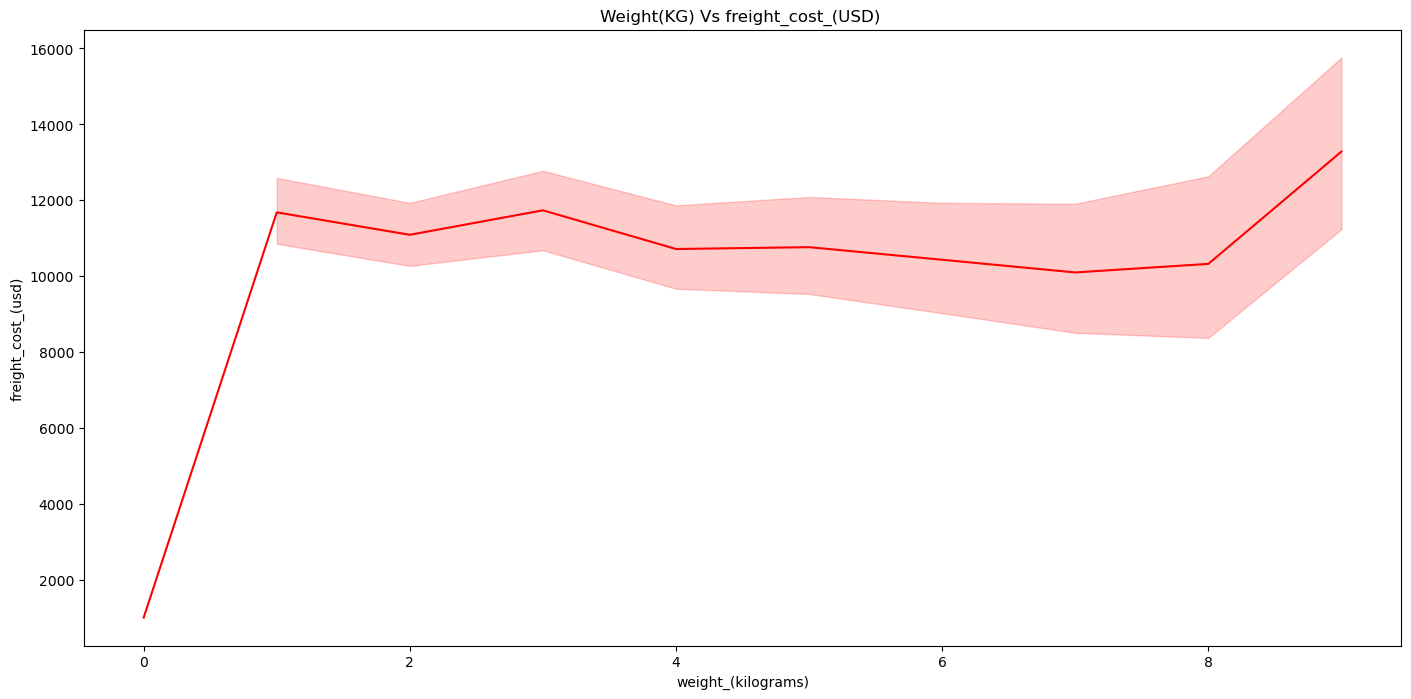

In [131]:
plt.subplots(figsize=(17,8))
sns.lineplot(data=df, x='weight_(kilograms)', y='freight_cost_(usd)', color='red')
plt.title("Weight(KG) Vs freight_cost_(USD) ")

#### Observation 
* There is very small positive correlation between weight(kilogram) and freight_cost_(usd)
* Only if weight > 8kg freight price will increase 

In [141]:
px.scatter(data_frame=df, x='line_item_quantity', y='line_item_value', color='line_item_value')


#### Observation 
* As the item quantity increased item value will also increased 
* there is strong positive correlation between this two features